# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

# Processing

### guo18

In [2]:
raw_ad = sc.read('guo18.h5ad')

In [5]:
raw_ad

AnnData object with n_obs × n_vars = 12053 × 77842 
    obs: 'CellType', 'Source'
    var: 'gene_ids'

In [7]:
raw_ad.obs.Source.value_counts()

Infant1_rep1    1855
Infant1_rep2    1486
Donor1_rep2     1248
Donor3_rep2     1132
Donor3_rep1     1116
Infant2_rep1    1113
Infant2_rep2    1110
Donor2_rep2     1008
Donor1_rep1     1000
Donor2_rep1      985
Name: Source, dtype: int64

In [8]:
raw_ad1 = raw_ad[raw_ad.obs.Source.str.startswith('Donor'), :].copy()

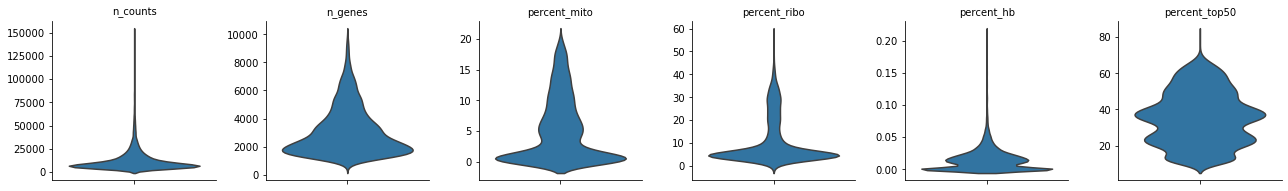

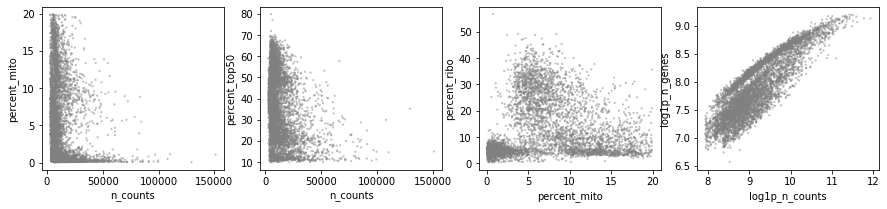

In [9]:
ss.lib.calculate_qc(raw_ad1)
ss.lib.plot_qc(raw_ad1)

In [10]:
ad1 = ss.lib.simple_default_pipeline(raw_ad1, batch='Source', filter_kw={'metrics': ['n_counts', 'n_genes', 'percent_top50']})

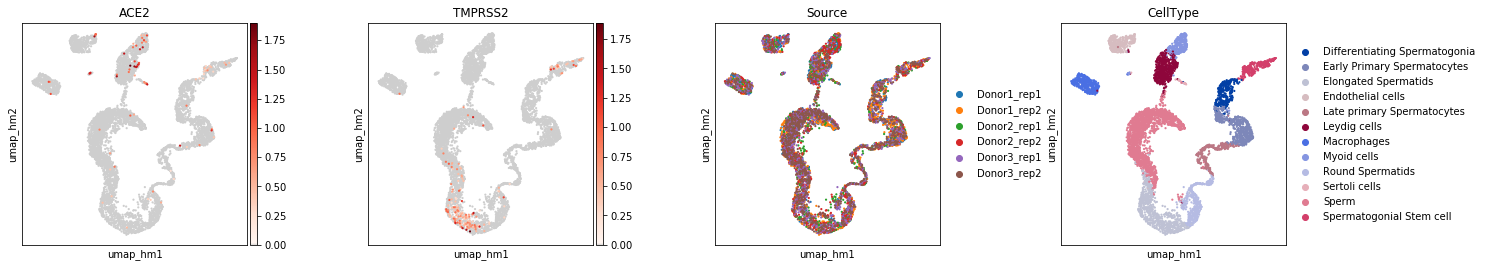

In [12]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(ad1, basis='umap_hm', color=['ACE2', 'TMPRSS2', 'Source', 'CellType'], wspace=0.4, color_map=expr_cmap)

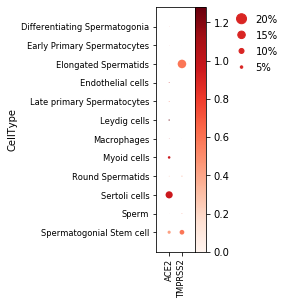

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [15]:
sc.pl.dotplot(ad1, var_names=['ACE2', 'TMPRSS2'], groupby='CellType', mean_only_expressed=True)